<a href="https://colab.research.google.com/github/sushrut88/Machine-Learning-Lab/blob/main/Practical_3_bonus_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00


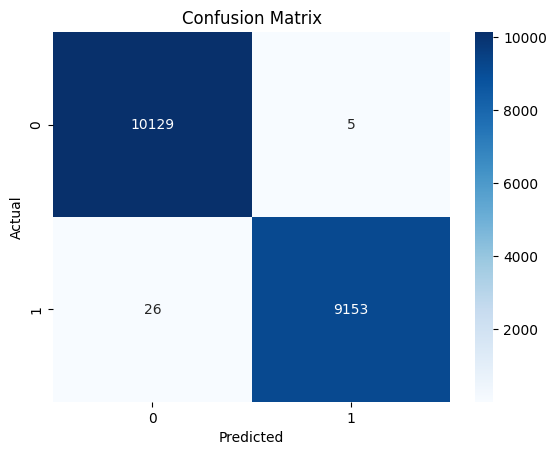

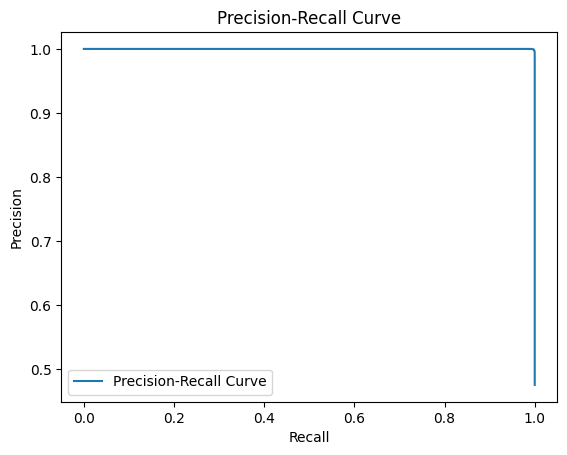

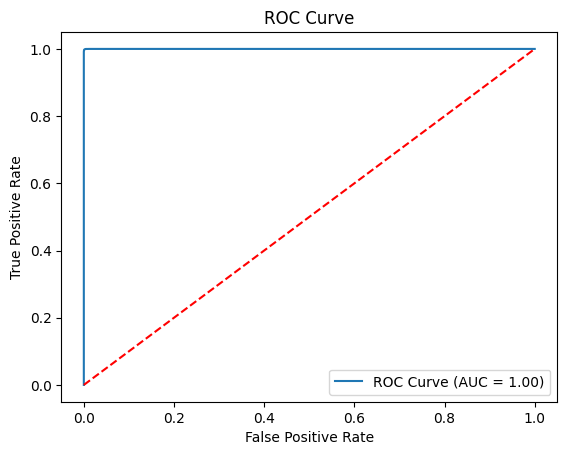

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.07


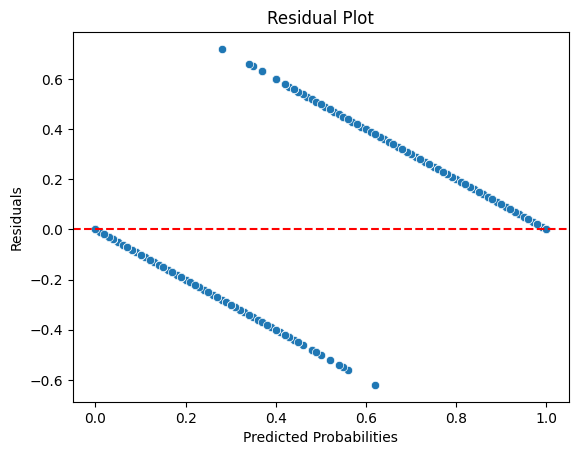

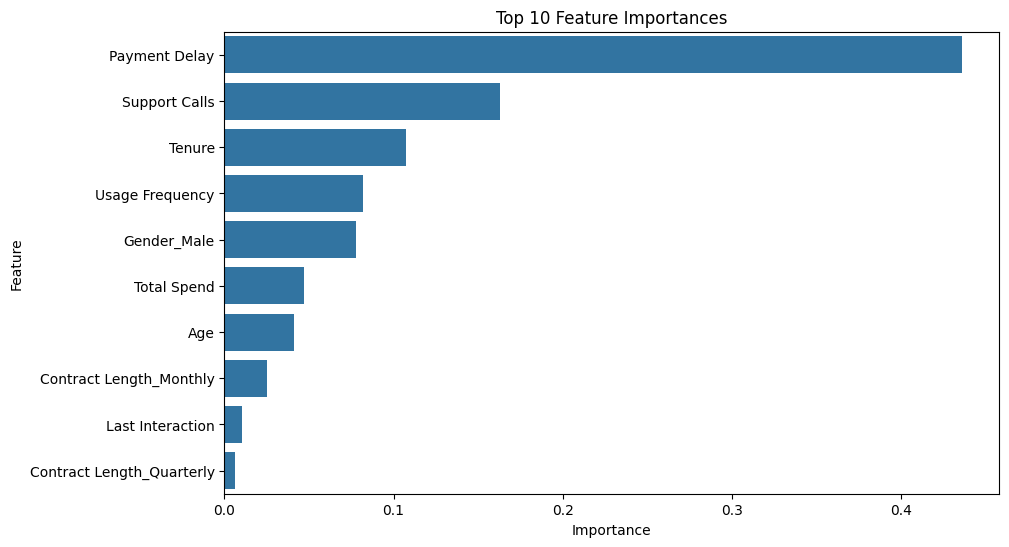

Feature Selection Insights:
                      Feature  Importance
4               Payment Delay    0.436431
3               Support Calls    0.162828
1                      Tenure    0.107520
2             Usage Frequency    0.081875
7                 Gender_Male    0.077534
5                 Total Spend    0.047256
0                         Age    0.040988
10    Contract Length_Monthly    0.025127
6            Last Interaction    0.010167
11  Contract Length_Quarterly    0.006469


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, mean_absolute_error,
    mean_squared_error
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("customer_churn.csv")  # Replace with your dataset path

# Handle missing values
numeric_cols = data.select_dtypes(include=["number"]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(include=["object"]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encode categorical variables
data = pd.get_dummies(data, columns=["Gender", "Subscription Type", "Contract Length"], drop_first=True)

# Drop irrelevant columns
X = data.drop(["Churn", "CustomerID"], axis=1)
y = data["Churn"]

# Feature Scaling Experiment: Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision-Recall Curve
precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Residual Analysis for Regression
# Using churn probabilities to simulate regression evaluation
regression_true = y_test  # Actual labels
regression_pred = y_pred_proba

mae = mean_absolute_error(regression_true, regression_pred)
mse = mean_squared_error(regression_true, regression_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Residual Plot
residuals = regression_true - regression_pred
sns.scatterplot(x=regression_pred, y=residuals)
plt.axhline(0, linestyle="--", color="red")
plt.title("Residual Plot")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Residuals")
plt.show()

# Feature Selection Experiment
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Insights
print("Feature Selection Insights:")
print(feature_importances.head(10))

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_tuned_pred_proba = best_model.predict_proba(X_test)[:, 1]
tuned_roc_auc = roc_auc_score(y_test, y_tuned_pred_proba)

print(f"Tuned Model ROC-AUC: {tuned_roc_auc:.2f}")
